<a href="https://colab.research.google.com/github/Desmondonam/NLP_1/blob/main/Speech_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Foundational Knowledge
## 1. Understanding of speech processing
   - Accoustics and Phonetics
   - Digital Signal Processing

## 2. Basics of NLP
- Text Processing
- Language models

# 2. Speech Recognintion
## 3. Audio Data Handling
- Working with Audio data
- Feature Extraction

## 4. Speech Recognition Models
- Classical Approaches
- Deep Learning Models
- End to End speech models

# 3. Advanced topics and Intergrations -
## 5. Language and Accoustic models
- Building Language Models
- Improve the accoustic models

## 6. Integrations
- Combining speech and text systems


# 4.  Real - world application and deployment
## 7. Testing and evaluation
## 8. Deployment

# Understanding Speech Processing
1. Accoustics - Study of sound, its production, transmission, and effect.
2. Phonetics - Study of human speech sounds
  - Aticulatory Phonetics
  - Accoustic Phonetics
  - Audiitory Phonetics

# Digital Signal Processing (DSP)
- Sampling and Quantization
- Fourier Transformation -
- Digital Filters
- Feature Extraction


# Loading an aoudio file


In [ ]:
! pip install librosa

In [ ]:
# Load the libraries
import librosa
import librosa.display
import matplotlib.pyplot as plt

In [ ]:
# Load the audio file
path = '/content/Recording.wav'
signal, sample_rate = librosa.load(path, sr=None)

In [ ]:
# Print
print(f"Audio signal: {signal[:10]}") # Print th eforst 10 samples
print(f"Sample Rate: {sample_rate}")

Audio signal: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Sample Rate: 48000


# Perform and Exploratory data ANalysis

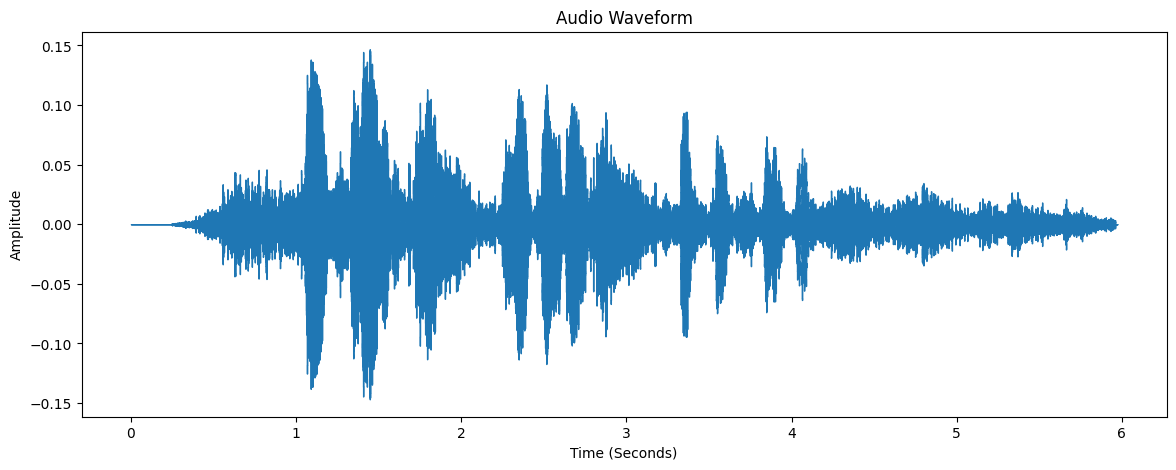

In [ ]:
# Plot the audio Waveform
plt.figure(figsize=(14, 5))
librosa.display.waveshow(signal, sr=sample_rate)
plt.title('Audio Waveform')
plt.xlabel('Time (Seconds)')
plt.ylabel('Amplitude')
plt.show()

# Display the spectrogram



In [ ]:
import numpy as np

In [ ]:
# Generate the spectrogram
X = librosa.stft(signal)
Xdb = librosa.amplitude_to_db(abs(X))

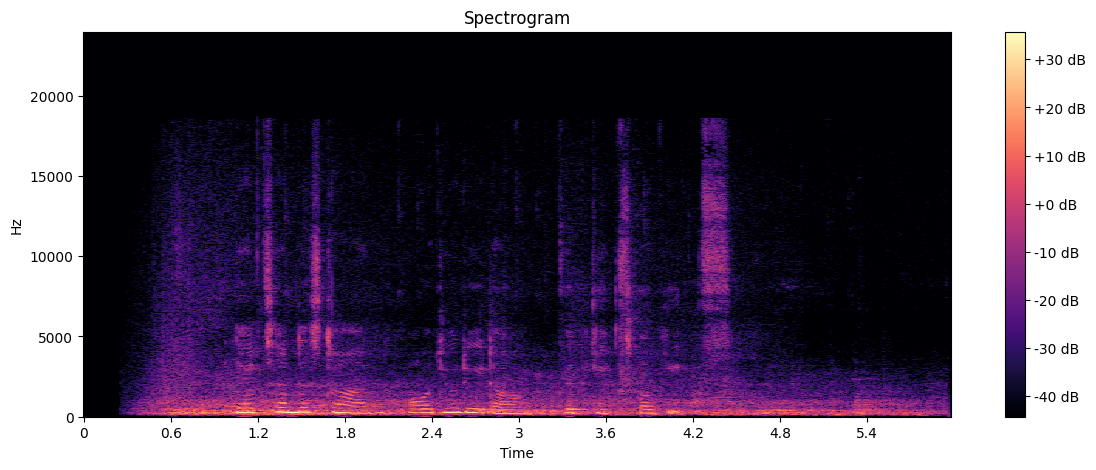

In [ ]:
plt.figure(figsize=(14, 5))
librosa.display.specshow(Xdb, sr=sample_rate, x_axis='time', y_axis = 'hz')
plt.colorbar(format='%+2.0f dB')
plt.title("Spectrogram")
plt.show()

## Analyzing the audio's Duration, Mim, Maz, and mean values


In [ ]:
duration_seconds = len(signal) / sample_rate
print(f"Duration: {duration_seconds:.2f} Seconds")
print(f"Minimum Amplitude: {np.min(signal)}")
print(f"Maximum Amplitude: {np.max(signal)}")
print(f"Mean Amplitude: {np.mean(signal)}")

Duration: 5.97 Seconds
Minimum Amplitude: -0.145355224609375
Maximum Amplitude: 0.14678955078125
Mean Amplitude: 3.186932735843584e-05


# Feature Extraction

### Frame the signal

In [ ]:
frame_size = 0.025 # Frame size in seconds
frame_stride = 0.01 # frame stride in seconds

In [ ]:
# Convert from seconds to samples
frame_length, frame_step = frame_size * sample_rate, frame_stride * sample_rate
signal_length = len(signal)
frames = []
for i in range(0, int(signal_length - frame_length), int(frame_step)):
  frames.append(signal[i:i + int(frame_length)])

In [ ]:
# Windowing
frames = np.array(frames)
hamming = np.hamming(int(frame_length))
windowed_frames = frames * hamming

## Feature Extractions:

1. Mel-Frequency cepstral COefficients (MFCCs)


In [ ]:
# Feature Extraction
mfccs = librosa.feature.mfcc(y=signal, sr = sample_rate, n_mfcc=13)

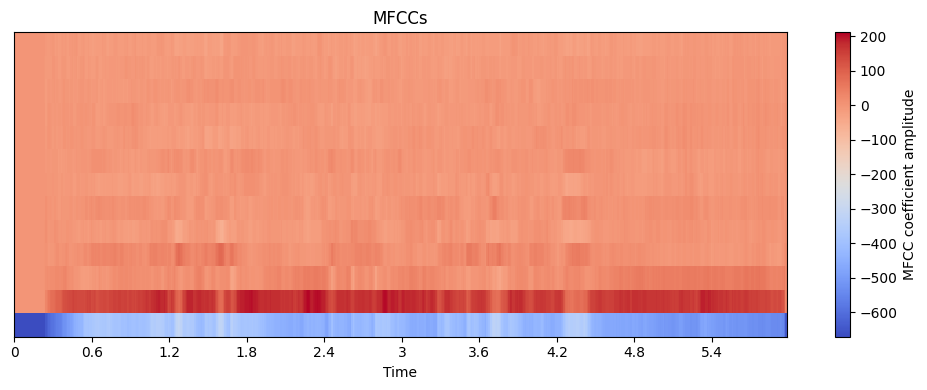

In [ ]:
# Visualize the mfcc
plt.figure(figsize=(10,4))
librosa.display.specshow(mfccs, x_axis='time', sr=sample_rate)
plt.colorbar(label='MFCC coefficient amplitude')
plt.title('MFCCs')
plt.tight_layout()
plt.show()

In [ ]:
# 2. Spectral Centroid
spectral_centroids = librosa.feature.spectral_centroid(y=signal, sr=sample_rate)

In [ ]:
# Compute teh time variable for visualization
frames = range(len(spectral_centroids))
time = librosa.frames_to_time(frames, sr=sample_rate)

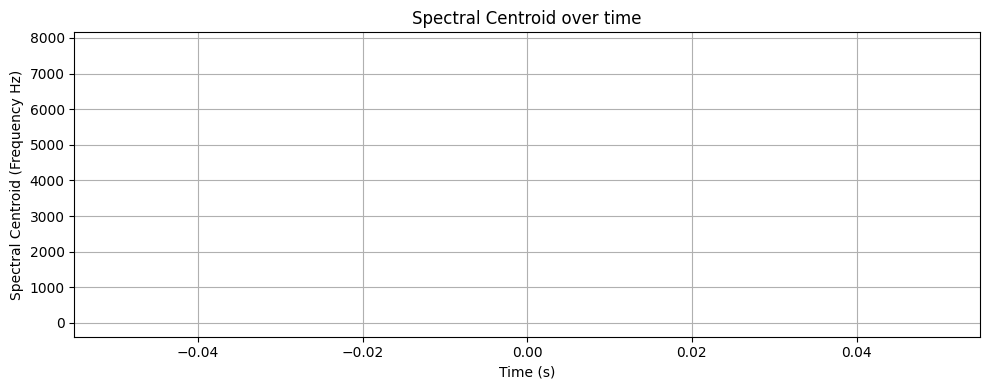

In [ ]:
plt.figure(figsize = (10,4))
plt.plot(time, spectral_centroids, color='b') # b is the short for blue
plt.grid()
plt.title('Spectral Centroid over time')
plt.ylabel('Spectral Centroid (Frequency Hz)')
plt.xlabel('Time (s)')
plt.tight_layout()
plt.show()

In [ ]:
# Chroma Frequencies
chroma = librosa.feature.chroma_stft(y=signal, sr= sample_rate)

In [ ]:
chroma

array([[0.        , 0.        , 0.        , ..., 0.9340016 , 0.91815346,
        0.97195697],
       [0.        , 0.        , 0.        , ..., 1.        , 1.        ,
        1.        ],
       [0.        , 0.        , 0.        , ..., 0.6862953 , 0.9713518 ,
        0.8731394 ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.3694652 , 0.5594539 ,
        0.8280587 ],
       [0.        , 0.        , 0.        , ..., 0.37617213, 0.41861832,
        0.81022334],
       [0.        , 0.        , 0.        , ..., 0.7122134 , 0.6242481 ,
        0.8424702 ]], dtype=float32)

In [ ]:
# Spectral Contrast
spectral_contrast = librosa.feature.spectral_contrast(y=signal, sr=sample_rate)

In [ ]:
spectral_contrast

array([[12.78170787, 12.78170787, 12.78170787, ...,  6.61255948,
         3.42023447,  0.67328174],
       [12.78170787, 12.78170787, 12.78170787, ...,  6.16297724,
         7.72024274,  3.77195068],
       [12.78170787, 12.78170787, 12.78170787, ..., 13.9892812 ,
         9.19124572,  6.94342462],
       ...,
       [12.78170787, 12.78170787, 12.78170787, ..., 15.26352746,
        13.56170796, 17.43969487],
       [12.78170787, 12.78170787, 12.78170787, ..., 16.54538571,
        14.76402873, 16.84230506],
       [12.78170787, 12.78170787, 12.78170787, ..., 27.23771849,
        23.76037835, 20.41797054]])

In [ ]:
#Zero Crossing rate
sero_crossing_rate = librosa.feature.zero_crossing_rate(signal)

In [ ]:
sero_crossing_rate

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.00585938, 0.01416016, 0.01953125,
        0.02587891, 0.02587891, 0.03027344, 0.03125   , 0.03125   ,
        0.03076172, 0.03027344, 0.03613281, 0.0390625 , 0.0390625 ,
        0.03369141, 0.03369141, 0.02783203, 0.03320312, 0.03710938,
        0.03271484, 0.03662109, 0.03076172, 0.02832031, 0.02832031,
        0.03222656, 0.03710938, 0.04052734, 0.05126953, 0.04785156,
        0.05322266, 0.04833984, 0.04101562, 0.03955078, 0.03222656,
        0.03271484, 0.02783203, 0.02685547, 0.02197266, 0.02929688,
        0.03271484, 0.03564453, 0.04492188, 0.03710938, 0.04003906,
        0.0390625 , 0.0390625 , 0.04394531, 0.03955078, 0.03710938,
        0.02929688, 0.02246094, 0.02197266, 0.02

# Interpreting and Explaining Deep Neural Networks for Classification of Audio Signals



The dataset can be accessed [Here](https://github.com/soerenab/AudioMNIST)

# Machine Learning Models

ASR - Automatic Speech Recognition

1. Hidden Markov Models
  - Evaluated with the WER - Word Error Rate

2. Gausian Mixture Models (GMMs)
   HMM-GMM
   - Evaluate WER

3. Deep Neural Networks (DNNs)
    - Output - Sequence of Text Units ==> WER

4. Connectionist Temporal Classification (CTC)

5. End to end Deep Learning Models
    - DeepSpeech
    - Listen Attend and Spell (LAS)
    - Transformer and Self Attention Models
    

# Hidden Markovs Model

In [ ]:
! pip install hmmlearn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 161.1/161.1 kB 1.7 MB/s eta 0:00:00


In [ ]:
from hmmlearn import hmm
import numpy as np

In [ ]:
# Example : Simple HMM with Gausian Emmision
model = hmm.GaussianHMM(n_components=3, covariance_type="diag")
data = np.random.randn(100, 2)

In [ ]:
# train the model
model.fit(data)

GaussianHMM(n_components=3)

In [ ]:
# Predict the states
hidden_states = model.predict(data)
print(hidden_states)

[1 1 1 0 1 1 2 2 2 2 2 2 0 1 1 1 1 2 0 1 2 2 2 2 2 2 2 2 2 0 1 1 2 2 2 0 1
 0 1 1 1 1 0 1 1 0 1 0 1 1 2 2 2 2 2 2 2 0 1 0 1 1 1 1 0 1 2 2 2 2 2 2 2 2
 2 2 2 0 1 1 1 1 0 1 2 2 2 2 2 2 2 2 0 1 0 1 2 2 2 2]


## GMM-HMM

In [ ]:
# Import the modules needed - numpy, hmmlearn, python_speech_features, jiwer
! pip install numpy hmmlearn python_speech_features jiwer

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.4/3.4 MB 13.1 MB/s eta 0:00:00
  Created wheel for python_speech_features: filename=python_speech_features-0.6-py3-none-any.whl size=5870 sha256=103ce1dbf79d889a53c1889b19f7f8a62416c7156e6ece6c33500c52379d1cf1
  Stored in directory: /root/.cache/pip/wheels/5a/9e/68/30bad9462b3926c29e315df16b562216d12bdc215f4d240294
Successfully built python_speech_features


In [ ]:
import numpy as np
from python_speech_features import mfcc
import scipy.io.wavfile as wav

In [ ]:
# Fucntion for feature extraction
def extract_features(audio_path):
  # Load the audion file
  y, sr = librosa.load(audio_path, sr=None)

  # Features
  features = {}

  # Extract the MFCC
  mfcc = librosa.feature.mfcc(y=y, sr=sr, n_mfcc=13)
  features['mfcc_mean'] = np.mean(mfcc, axis=1)
  features['mfcc_var'] = np.var(mfcc, axis=1)

  # Get the spectral centroid
  spectral_centroid = librosa.feature.spectral_centroid(y=y, sr=sr)
  features['spectral_centroid_mean'] = np.mean(spectral_centroids)
  features['spectral_centroid_var'] = np.var(spectral_centroids)

  return features

In [ ]:
# Build the HMM-GMM Model
from hmmlearn import hmm

def build_hmm_gmm(n_components, n_mixtures, n_iter= 100):
  model = hmm.GMMHMM(n_components=n_components, n_mix=3, n_iter=n_iter, random_state = 42)
  return model

In [ ]:
# Train the model
def train_model(model, features):
  model.fit(features)
  return model

In [ ]:
# Make predictions
def predict(model, features):
  logprob, labels = model.decode(features)
  return labels

In [ ]:
# Evaluate the model
from jiwer import wer

def calculate_wer(ground_truth, hypothesis):
  error = wer(ground_truth, hypothesis)
  return error

In [ ]:
# Example
audio_path = '/content/audio.mp3'
ground_truth = ''' So by now you might have already seen that chat GPT get integrated into Siri in the form of a shortcut. But the problem with every shortcut before the one I'm going to show you today is that they only basically processed your queries through OpenAI, through chat GPT, and spit out the result. That was it. There was nothing more complex than that. But this shortcut, SGPT by Federico Vitechi, is next level. Just watch this. Create a playlist with 13 of the best workout songs that were released between 2015 and 2023. Put an emphasis on hip hop and sort them by newest to oldest. It's pretty complex. So we're going to tap on Done. Boom. Playlists created 13 songs added. Let's go to our playlist and see, let's cancel out of that. Let's go into our music, go to Playlist and check this out. Up top, we have F right there and take a look at this. It put an emphasis on hip hop because every single one of these are hip hop and you can see we have 13 songs that are going to be good for working out. Tell me that's not incredible. It's integrating with iOS, macOS, any operating system you have and pulling this information and doing it for you. This shortcut also has conversational mode, which means that it's going to remember what you said before hands. If you want to change something, if it spits out a result you don't like, you could tell it to change something and it will do it. It will remember what you said previously. And by the way, I will be sharing more tips and details on this shortcut in my free Apple Den Newsletter. So make sure it's on up for that. It is the first link down in the description below. Okay, so let's go ahead and show you how to get this up and running on your iPhone, iPad, Mac or Apple Watch. It works across all Apple platforms. And again, it's going to tie in with the system functions and the system features of the device you're using, which is incredible. So first thing you need to do is head over to platform.openai.com. From here, you want to tap on the hamburger menu up in the top right, the three lines right there and then go to account and then to billing overview. Once you get to the billing overview, you'll probably see that you are running on a free trial. However, we are going to have to pay a tiny amount for this to work. The reason being is because we are pulling it from the OpenAI Developer API, which is not free. It's going to cost you a tiny amount. And by the way, I've been using this for a while now and my grand total for the month is under $1. So we're talking about pennies, potentially even maybe a dollar or two per month. They're going to be spending max on this. However, we do also need to set up our usage limits after you set up your billing. Once you put in your credit card info, and we're going to set a hard limit and a soft limit. So the hard limit is going to be the amount of money that you do not want to spend more than per month. So I don't want to spend more than $3 a month on this. So I put that in as my hard limit. Now, my soft limit is when I'm going to get a notification of my email that I hit my soft limit and then I'm approaching my hard limit. So you want to put the soft limit a little bit below the hard limit. Once you have your billing information set up, we're going to go back to the three dots up top. We're going to go to API reference and then from here scroll down until you see authentication and then you will see a link that says API keys right here. We're going to tap on that and it's going to take us to the API keys section of our settings. This page is easier to find on desktop, but I'm just showing this example on mobile. So from here, you're going to see secret keys. And from here, we're going to tap on create new secret key. Once you tap on that, you will get an API key that is generated and you do not want to share this with anybody else. You want to keep it to yourself and you will see it copied right here. So what we're going to do is we're just going to select that and copy. And now is when we're going to download the SGT shortcut. So I will leave this linked in the description below. As mentioned earlier, this is it right here. We're going to tap on get shortcuts. I went ahead and delete a mine. So I can do this again. We're going to go to set up shortcuts. And from here is where we're going to put in our API key. So right where it says configure tap on paste. There we go. Hit done, add shortcuts. And it says I already have a shortcut for this. So I'm going to go ahead and replace that. And you will see it work perfectly. Now when you go into your shortcut section right here. And then you do also want to install the sgpt encoder. Again, you have to have this for this shortcut to work. This will also be linked in the description below. You need to download both separately. And by the way, if you go into the shortcut and then scroll down into you see where it says the chat gpt model to use. And it says gpt 3.5 turbo. That is basically just saying which chat gpt model to use. So if you have access to the chat gpt 4 API, you would just change this to gpt-4. But for now, I only have access to chat gpt 3.5 turbo. So I'm just going to keep that as default. And by the way, if you have any trouble setting this up, just let me know in a comment down below. And I will try to get back to you in those comments. And again, I will continue expanding on this end up my newsletter. But anyways, let's have some fun now. Let me show you some more power of this. Now you already saw that we can create a full on playlist just by saying, you know, create a playlist that's good for workout. So it's actually going to add it. You don't need to take any additional step. But we're going to go a little bit further. So first off, I want to go into here and we're going to tap on the share into the shortcut and tap on the share button. And we're going to go to add to home screen. And we're going to add the default name and logo. I prefer to do this by tapping on this from the home screen. You can always ask Siri to run the SGPT shortcut and then say it, everything with your voice. But I just find running it from, you know, pressing a button on the home screen to be much better, much more effective and much easier for me. All right. So we're going to go into Safari and select a big block of text here. So we're going to just simply copy this. And now we're going to go back to our SGPT. And I'm going to say this, summarize the text that I have copied to the clip board right now in 200 words or less. And boom, look at that. It gives us a breakdown of what happened in that article in 200 words or less. Now what's really cool about this is watch this. I didn't like that summary. Make it a little bit more interesting and make it only 100 words this time. So again, we're having a conversation with the SGPT shortcut here. And this is because we have conversational mode built in. So you could see it took that. I didn't have to say anything again and take a look at this and makes it more interesting and also less words. Here's another good example of the same thing. But this time not even with text just with links. And I'm going to have it tell me, you know, the summary of these three articles, summarize the three articles I have linked in my clip board and make it 200 words or less for each. How crazy is that? It even says article one, article two, and a article three. That is insane. But hold on, it gets even crazier. Export chat. Take a look at that. I can copy the latest response. I can copy the full chat. I can preview the full chat. I can translate it or I can stop. Take a look at that. I'm going to go ahead and preview the full chat and look what it's going to do. It's going to show me what I asked and what it spit out. How insane is that? This makes everything so much easier. What are the five best things to do in Las Vegas? Okay, it's a pretty cool ideas. I'm on a budget though. I don't really have much money. What hotel can I stay in on the strip? Take a look at my calendar and tell me what weekend would I be free to go on a trip to Vegas? I want it to be from Thursday to Sunday. Make sure I don't have any events on any of those days. And here we go again. It's going to pull in the native calendar application into this query here. It's going to check my calendar to see which days I don't have anything going on for like a Thursday to a Sunday, for example, or whatever I just said. Now you could also do your typical chat GPT things where you could ask it to write blog posts or you could ask it for recipes and things like that. But again, the real power of this is that it integrates into your native operating system. It's going to be able to pull from like your notes, your clipboard. It's going to be able to tie into Apple music. Now, of course, this isn't, you know, fully expanded yet. It doesn't tie into everything on device. This is just version 1.0. But it's going to continue improving. And this shortcut is just so insanely powerful. It also ties in with shortcuts like the shortcuts applications. If you have other shortcuts, you could tie this shortcut into those shortcuts and kind of make your workflow so much easier as well. I know it's kind of confusing, especially if you're new to shortcuts and chat GPT. But trust me, it is incredible. You want to go ahead and download it and get yourself familiar with it because it is going to be a game changer on the iPhone for the foreseeable future. I honestly hope that Apple can implement something like this natively so we don't even need to rely on shortcuts. But I highly doubt that's happening anytime soon. Give me a list of 10 rock songs that are not too hard rock, but they're kind of new, maybe from 2019 through 2023. And add those to a playlist called I Like These. All right, so I created a playlist of 10 songs. Let's go ahead and back and check out what it created. Let's go back here. We're going to see T and it shows rock that's not hard rock. I like it. I actually like pretty much every song in here. Great job with this SGPT shortcuts. As you can see, the possibilities are just simply endless. And again, the fact that this ties in to the native functions of iOS, macOS, iPadOS, watchOS makes this just so much better than any previous chat, GPT shortcut you've seen. Now, yes, it is a little bit, you know, you do have to put in your billing information. It's not expensive. It's not pricey. Like I said, it's going to be maybe a couple dollars a month max and you could set your limits. So you don't actually go above that. So you're not really spending a ton of money, but it is a couple of extra steps that you do have to take. But in my opinion, it's worth it. I will be sharing more prompts and more tips and more updates on this application in my Apple Dan newsletter. I will also make another video here on YouTube if this does continue, you know, getting improvements and, you know, big updates and over time, which I know it will because this comes from the teaching who has a great track record with, you know, updating shortcuts and things like that. So I fully expect this to get more powerful as time goes on. And of course, as AI enhances as well, this will also get better, especially once GPT4 and that API is available for everybody, this shortcut is going to be insane. I hope you enjoyed the video. If you did, I would appreciate it if you give it a thumbs up. Also, make sure to subscribe for more iPhone tips and tricks just like this one. But anyways, guys, thanks again for watching and I'll see you soon.'''

In [ ]:
# Extract features
features = extract_features(audio_path)

# Builf the mdoel
model = build_hmm_gmm(n_components=5, n_mixtures=3)

#train the mdoel
model = train_model(model, features)

# prediction
predicted_labels = predict(model, features)

<ipython-input-45-8ef755ad7f61>:4: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(audio_path, sr=None)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


ValueError: Expected 2D array, got scalar array instead:
array={'mfcc_mean': array([-3.5539026e+02,  1.6156134e+02, -4.0057158e+00,  1.4354686e+01,
        1.0195529e+01,  2.4352480e+01, -2.7277830e-01, -2.1057978e+01,
       -1.6430615e+00,  7.2458258e+00, -1.6152403e+01, -1.0692894e+01,
        8.4307451e+00], dtype=float32), 'mfcc_var': array([5526.9404 , 4476.8506 , 1000.61755, 1468.6771 ,  906.0296 ,
        457.5447 ,  264.03638,  278.39514,  180.1392 ,  169.60591,
        169.59338,  158.13788,  179.85956], dtype=float32), 'spectral_centroid_mean': 2027.2436814551302, 'spectral_centroid_var': 1835125.8222737983}.
Reshape your data either using array.reshape(-1, 1) if your data has a single feature or array.reshape(1, -1) if it contains a single sample.

# Deep Neural Networks

In [ ]:
# Install the libraries
!pip install torch torchaudio

  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.19.3-py3-none-manylinux1_x86_64.whl (166.0 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (99 kB)
  Using cached nvidia_nvjitlink_cu12-12.4.127-py3-none-m

In [ ]:
# Load and preproces the data
import librosa.display

# Fucnton
def load_audio_and_plot_spectrogram(file_path):
  # Load the data
  y, sr = librosa.load(file_path, sr=22050)
  # Create a spectrogram
  S = librosa.feature.melspectrogram(y=y, sr=sr, n_fft=2048, hop_length=512, n_mels = 128)
  S_DB = librosa.power_to_db(S, ref=np.max)

  plt.figure(figsize= (10,4))
  librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel')
  plt.colorbar(format='%+2.0f dB')
  plt.title("Mel-Frequency Spectrogram")
  plt.tight_layout()
  plt.show()


<ipython-input-59-f91401ff04a6>:7: UserWarning: PySoundFile failed. Trying audioread instead.
  y, sr = librosa.load(file_path, sr=22050)
/usr/local/lib/python3.10/dist-packages/librosa/core/audio.py:183: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


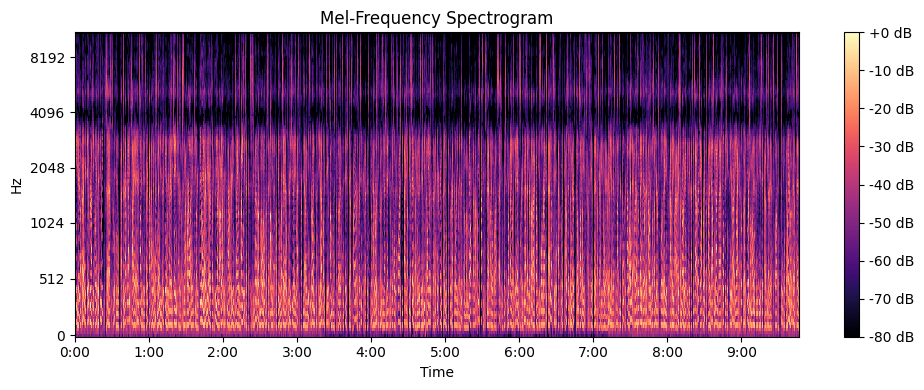

In [ ]:
# Usage
load_audio_and_plot_spectrogram('/content/audio.mp3')

In [ ]:
# Build a deep learnign model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [ ]:
# Functon to build the model
def build_model(input_shape):
  model = Sequential([
      Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
      MaxPooling2D((2, 2)),
      Conv2D(64, (3, 3), activation='relu'),
      MaxPooling2D((2, 2)),
      Conv2D(128, (3, 3), activation='relu'),
      MaxPooling2D((2, 2)),
      Flatten(),
      Dense(64, activation='relu'),
      Dense(26, activation='softmax')
  ])

  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model

In [ ]:
model = build_model(input_shape=(128,44,1))

In [ ]:
## Task: Create a data preparation function that you would run to give prepare teh data

X_train, X_test, y_train, y_test = prepare_data()

In [ ]:
model.fit(X_train, y_train, epochs=10, validation_data=X_test, y_test)